<a href="https://colab.research.google.com/github/shadowbd/Airline_delay_/blob/main/Copy_of_Logistic_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_modeling_sample.csv to df_modeling_sample.csv


In [ ]:
uploaded

In [ ]:
import pandas as pd
pd.set_option("display.max_columns", None)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import os
from sqlalchemy import create_engine
import time
from datetime import datetime, date, time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
import scipy.stats as st

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
df = pd.read_csv('df_modeling_sample.csv')

In [ ]:
df.head()

,Unnamed: 0,distance,weather_delay_mean,weather_delay_mean.1,nas_delay_mean,security_delay_mean,late_aircraft_delay_mean,arr_delay,flight_delay,flight_time_afternoon,flight_time_early-morning,flight_time_evening,flight_time_mid-night,flight_time_morning,flight_time_night,flight_season_spring,flight_season_summer,flight_season_winter,flight_length_medium,flight_length_short
0,70097,907.0,0.366193,0.366193,2.031661,0.007455,2.796585,-2.0,0,0,0,1,0,0,0,1,0,0,1,0
1,59638,919.0,0.417663,0.417663,2.399724,0.014523,4.116784,52.0,1,1,0,0,0,0,0,1,0,0,1,0
2,107757,1747.0,0.366193,0.366193,2.031661,0.007455,2.796585,34.0,1,0,0,0,0,1,0,0,1,0,1,0
3,107970,1587.0,0.366193,0.366193,2.031661,0.007455,2.796585,2.0,1,0,0,1,0,0,0,1,0,0,1,0
4,117212,2504.0,0.366193,0.366193,2.031661,0.007455,2.796585,-5.0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'distance', 'weather_delay_mean', 'weather_delay_mean.1',
       'nas_delay_mean', 'security_delay_mean', 'late_aircraft_delay_mean',
       'arr_delay', 'flight_delay', 'flight_time_afternoon',
       'flight_time_early-morning', 'flight_time_evening',
       'flight_time_mid-night', 'flight_time_morning', 'flight_time_night',
       'flight_season_spring', 'flight_season_summer', 'flight_season_winter',
       'flight_length_medium', 'flight_length_short'],
      dtype='object')

In [ ]:
df.drop(axis = 1, labels = ['Unnamed: 0', 'arr_delay'], inplace = True)

In [ ]:
y = df['flight_delay']

In [ ]:
X = df.loc[:, df.columns != 'flight_delay']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.fit_transform(X_test)

In [ ]:
log_model = LogisticRegressionCV()

In [ ]:
fit_data = log_model.fit(scaler_X_train, y_train)

In [ ]:
log_model.C_

array([2.7825594])

In [ ]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
log_model.coef_

array([[-0.00319418, -0.0060785 , -0.0060785 ,  0.01980846,  0.06725883,
         0.15151235, -0.44446733, -0.51499712, -0.31218248, -0.0014026 ,
        -0.52140678, -0.17891307,  0.08471443,  0.13653432,  0.07185519,
         0.17819788,  0.14095031]])

In [ ]:
y_pred = log_model.predict(scaler_X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[983,  28],
       [497,  36]])

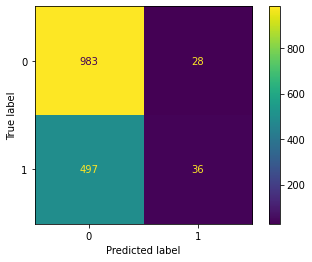

In [ ]:
plot_confusion_matrix(log_model, scaler_X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.97      0.79      1011
           1       0.56      0.07      0.12       533

    accuracy                           0.66      1544
   macro avg       0.61      0.52      0.45      1544
weighted avg       0.63      0.66      0.56      1544



In [ ]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

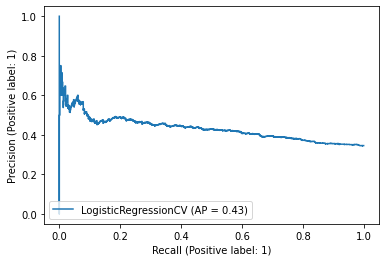

In [ ]:
plot_precision_recall_curve(log_model, scaler_X_test, y_test)

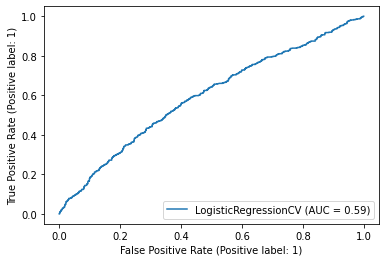

In [ ]:
plot_roc_curve(log_model, scaler_X_test, y_test)

In [ ]:
y_pred = fit_data.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.34520725388601037


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.5875434059590919


In [ ]:
print('R2 score:', metrics.r2_score(y_test, y_pred))

R2 score: -0.5272007912957466


In [ ]:
# lin_params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
# grid_lin = GridSearchCV(LinearRegression(), lin_params, cv=5, verbose=1, n_jobs=-1)
# grid_lin.fit(X_train, y_train)
# linreg = grid_lin.best_estimator_
# linreg_score = cross_val_score(linreg, X_train, y_train, cv=5)
# print('Cross Validation Score: ', round(linreg_score.mean() * 100, 2).astype(str) + '%')
# print("training R2 / Variance: ", round(grid_lin.best_score_,2))
# print(f"Residual Sum of Squares: {round(np.mean((grid_lin.predict(X_test) - y_test) ** 2),2)}")
# y_linreg = linreg.predict(X_test)
# print('\nLinear Regression - y_test')
# print('R2 Score \t{:.2f}'.format(metrics.r2_score(y_test, y_linreg)))
# print('Test RMSE \t{:.2f}'.format(metrics.mean_squared_error(y_test, y_linreg)))
# print('Test MAE \t{:.2f}\n'.format(metrics.mean_absolute_error(y_test, y_linreg)))

In [ ]:
logres = LogisticRegression(max_iter=1000)
penalty = ['l1', 'l2']
C = np.logspace(0,4,10)
params_dict = {'penalty' : ['l1','l2'], 'C' : np.logspace(0,4,10)}
k_folds = KFold(n_splits=5)
grid = GridSearchCV(estimator=logres, param_grid=params_dict, cv=k_folds, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

NameError: ignored

In [ ]:
y_train = y_train.ravel()
X_train = np.array(X_train)

In [ ]:
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Best Score: -903.3153920957486
Best Hyperparameters: {'C': 166.81005372000593, 'penalty': 'l2'}


In [ ]:
y_pred = grid_result.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 17.841321243523318


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 942.7130829015545


In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 30.703633057043177


In [ ]:
print('R2 score:', metrics.r2_score(y_test, y_pred))

R2 score: -0.13264803552572801
